# 3D Relationship Testing

Testing relationships between 3D structures defined using contours on multiple slices.


In [2]:
import logging

# Local functions and classes
from types_and_classes import *
from utilities import *
from debug_tools import *
from structure_set import *
from relations import *

### Global Settings

In [3]:
PRECISION = 2

In [4]:
%matplotlib inline

## Relationship Tests by Relationship Type

### Color Coding
<table style="border: 2px solid black; width=50px;"><tr><td>
<ul style="font-weight: 900; font-size: 20px;">
<li style="color: blue;">region a</li>
<li style="color: green;">region b</li>
<li style="color: orange;">intersection of a & b</li></ul>
</tr></td></>

## Contains

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Contains</th><th>Transitive</th></tr>
<td class="d" colspan="2">
All points of <span class="b">b</span> lie in the interior of <span class="a">a</span>, no points of <span class="b">b</span> lie in the exterior of <span class="a">a</span>, some points in <span class="a">a</span> are exterior to <span class="b">b</span>, and the boundaries of <span class="a">a</span> and <span class="b">b</span> do not intersect.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/contains simple.png" alt="Contains">
<img src="../../Images/Relationships/contains with hole.png" alt="Contains With Hole">
</td></tr>
</table></td></tr></table>

### Contains

#### Embedded Spheres
![Embedded Spheres](<../../Images/FreeCAD Images/Embedded Spheres.png>)

In [5]:
def embedded_spheres_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    # embedded boxes
    sphere6 = make_sphere(roi_num=1, radius=3, spacing=slice_spacing)
    sphere3 = make_sphere(roi_num=2, radius=1.5, spacing=slice_spacing)
    # combine the contours
    slice_data = sphere6 + sphere3 + body
    return slice_data

In [6]:
slice_data = embedded_spheres_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Concentric Cylinders
![Concentric cylinders](<../../Images/FreeCAD Images/Concentric cylinders.png>)

In [7]:
def simple_cylinders_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.0,
                                  offset_z=0,
                                  spacing=slice_spacing)
    # Centred cylinder
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder within primary
    contained_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=0.6,
                                                offset_x=0, offset_z=0,
                                                spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + contained_cylinder
    return slice_data


In [8]:
slice_data = simple_cylinders_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Embedded Boxes
![Embedded Boxes](<../../Images/FreeCAD Images/Embedded Boxes.png>)

In [9]:
def embedded_boxes_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube3 = make_box(roi_num=2, width=3, offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = cube6 + cube3 + body
    return slice_data

In [10]:
slice_data = embedded_boxes_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Parallel Cylinders
- Concentric cylinders with interior cylinder ending inside the exterior cylinder by one slice

![Parallel Cylinders](<../../Images/FreeCAD Images/Parallel Cylinders.png>)

In [11]:
def parallel_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10, offset_z=0,
                                  spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_middle_cylinder = make_vertical_cylinder(roi_num=2, radius=1,
                                                   length=6,
                                                   offset_x=2.5, offset_z=0,
                                                   spacing=slice_spacing)
    # combine the contours
    slice_data = body + left_cylinder + right_cylinder + right_middle_cylinder
    return slice_data


In [12]:
slice_data = parallel_cylinders_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

Relationship: Contains


#### Sphere in Sphere in Sphere
- Hollow spheres with an inner sphere and second structure inside the inner sphere.

![Sphere in Sphere in Sphere](<../../Images/FreeCAD Images/Sphere in Spheres in Shell.png>)

In [13]:
def nested_spheres_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=16, length=20, offset_z=0,
                                  spacing=slice_spacing)
    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole10 = make_sphere(roi_num=1, radius=5, spacing=slice_spacing)
    sphere8 = make_sphere(roi_num=1, radius=4, spacing=slice_spacing)
    sphere6 = make_sphere(roi_num=2, radius=3, spacing=slice_spacing)

    # combine the contours
    slice_data = body + sphere12 + hole10 + sphere8 + sphere6
    return slice_data


In [14]:
slice_data = nested_spheres_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONTAINS

d:\.conda\envs\StructureRelations\Lib\site-packages\shapely\linear.py:203: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
d:\.conda\envs\StructureRelations\Lib\site-packages\shapely\linear.py:203: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
d:\.conda\envs\StructureRelations\Lib\site-packages\shapely\linear.py:203: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)


Relationship: Contains


## Surrounds

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Surrounds</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no points in common, but the Convex Hull of <span class="a">a</span> contains <span class="b">b</span>.
</td></tr><tr><td colspan="2">
<img src="../../Images/Relationships/shelters.png" alt="shelters">
</td></tr></table>


#### Simple Surrounded Cylinders
- Concentric hollow cylinders with an interior cylinder ending inside the outer cylinder's hole by one slice

![Simple Surrounded Cylinders](<../../Images/FreeCAD Images/Surrounded cylinders.png>)

In [15]:
def surrounded_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [16]:
slice_data = surrounded_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


In [17]:
def shelters_open_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=8,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [18]:
slice_data = shelters_open_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

Relationship: Shelters


#### Horizontal Surrounded Cylinders
- Concentric hollow cylinders with an interior cylinder ending inside the outer cylinder's hole by one slice

![Horizontal Cylinders](<../../Images/FreeCAD Images/Horizontal Surrounded cylinders.png>)

In [19]:
def surrounded_horizontal_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [20]:
slice_data = surrounded_horizontal_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]


In [21]:
relation = structure_a.relate(structure_b)

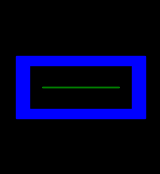

In [22]:
poly_a = structure_a.get_slice(3.5)
poly_b = structure_b.get_slice(3.5)
ax = plot_ab(poly_a, poly_b, add_axis=False)

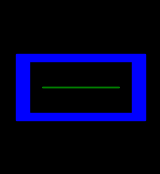

In [23]:
poly_a = structure_a.get_slice(3.0)
poly_b = structure_b.get_slice(3.0)
ax = plot_ab(poly_a, poly_b, add_axis=False)

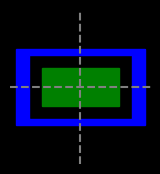

In [24]:
poly_a = structure_a.get_slice(0.0)
poly_b = structure_b.get_slice(0.0)
ax = plot_ab(poly_a, poly_b)

In [25]:
structure_a.contour_lookup

,ROI,SliceIndex,HoleType,Interpolated,Boundary,ContourIndex,RegionIndex,Label
29,1,-6.5,None,True,True,530,1A,"(1, -6.5, 530)"
0,1,-6.0,None,False,False,501,1A,"(1, -6.0, 501)"
25,1,-5.5,Closed,True,True,526,1B,"(1, -5.5, 526)"
26,1,-5.5,None,True,False,527,1A,"(1, -5.5, 527)"
1,1,-5.0,None,False,False,502,1A,"(1, -5.0, 502)"
2,1,-5.0,Closed,False,False,503,1B,"(1, -5.0, 503)"
3,1,-4.0,None,False,False,504,1A,"(1, -4.0, 504)"
4,1,-4.0,Closed,False,False,505,1B,"(1, -4.0, 505)"
30,1,-3.5,None,True,False,546,1A,"(1, -3.5, 546)"
31,1,-3.5,Closed,True,False,547,1B,"(1, -3.5, 547)"


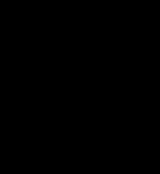

In [26]:
poly_a = structure_a.get_slice(4)
poly_b = structure_b.get_slice(4)
ax = plot_ab(poly_a, poly_b, add_axis=False)

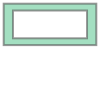

In [27]:
list(poly_a.regions.values())[0]

In [28]:
structure_b.contour_lookup

,ROI,SliceIndex,HoleType,Interpolated,Boundary,ContourIndex,RegionIndex,Label
7,2,-3.5,None,True,True,538,2A,"(2, -3.5, 538)"
0,2,-3.0,None,False,False,531,2A,"(2, -3.0, 531)"
1,2,-2.0,None,False,False,532,2A,"(2, -2.0, 532)"
2,2,-1.0,None,False,False,533,2A,"(2, -1.0, 533)"
3,2,0.0,None,False,False,534,2A,"(2, 0.0, 534)"
4,2,1.0,None,False,False,535,2A,"(2, 1.0, 535)"
5,2,2.0,None,False,False,536,2A,"(2, 2.0, 536)"
6,2,3.0,None,False,False,537,2A,"(2, 3.0, 537)"
8,2,3.5,None,True,True,539,2A,"(2, 3.5, 539)"


In [29]:
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


#### Sphere in Shell
- Hollow sphere with the second structure as an inner sphere.

![Sphere in Shell](<../../Images/FreeCAD Images/Sphere in Shell.png>)

In [30]:
def sphere_in_shell_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=16, length=20, offset_z=0,
                                  spacing=slice_spacing)
    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole10 = make_sphere(roi_num=1, radius=5, spacing=slice_spacing)
    sphere6 = make_sphere(roi_num=2, radius=3, spacing=slice_spacing)

    # combine the contours
    slice_data = body + sphere12 + hole10 + sphere6
    return slice_data


In [31]:
slice_data = sphere_in_shell_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SURROUNDS

d:\.conda\envs\StructureRelations\Lib\site-packages\shapely\linear.py:203: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)
d:\.conda\envs\StructureRelations\Lib\site-packages\shapely\linear.py:203: RuntimeWarning: invalid value encountered in shortest_line
  return lib.shortest_line(a, b, **kwargs)


Relationship: Surrounds


#### Sphere in Cylinder in Box
![alt text](<../../Images/FreeCAD Images/Sphere in Cylinder in Box.png>)

In [32]:
def surrounds_sphere_in_cylinders_in_box_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=10, length=10, height=10, spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_sphere = make_sphere(roi_num=2, radius=1,
                               offset_x=2.5, offset_z=0,
                               spacing=slice_spacing)
    # combine the contours
    slice_data = body + cube6 + left_cylinder + right_cylinder + right_sphere
    return slice_data

In [33]:
slice_data = surrounds_sphere_in_cylinders_in_box_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SURROUNDS

Relationship: Surrounds


## Shelters
<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Shelters</th><th>Transitive</t></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> have no points in common, but the Convex Hull of <span class="a">a</span> contains <span class="b">b</span>.
</td></tr><tr><td colspan="2">
<img src="../../Images/Relationships/shelters.png" alt="shelters">
</td></tr></table>

- Surrounds geometry with hole opened to exterior


In [34]:
def shelters_open_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=8,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [35]:
slice_data = shelters_open_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

Relationship: Shelters


In [36]:
def shelters_horizontal_cylinder_single_side_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                              spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=4, length=8,
                                             offset_x=1, offset_z=0,
                                             spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3,
                                                   length=6, offset_x=1,
                                                   spacing=slice_spacing)

    # combine the contours
    slice_data = outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [37]:
slice_data = shelters_horizontal_cylinder_single_side_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

Relationship: Shelters


#### Horizontal Sheltered Cylinder
- Cylindrical shell with an interior cylinder ending inside the outer cylinder

![Sheltered Horizontal cylinder](<../../Images/FreeCAD Images/Sheltered Horizontal cylinder.png>)

In [38]:
def shelters_horizontal_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [39]:
slice_data = shelters_horizontal_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

Relationship: Shelters


#### Simple Sheltered Vertical Cylinder
- Hollow cylindrical shell with an interior cylinder ending inside the shell

![Sheltered cylinder](<../../Images/FreeCAD Images/Sheltered cylinder.png>)

In [40]:
def shelters_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    surrounded_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


**Currently identified as _Surrounds_**

In [41]:
slice_data = shelters_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.SURROUNDS

Relationship: Shelters


#### Sphere in Cylinder in Box
![alt text](<../../Images/FreeCAD Images/Sphere in Cylinder in Box.png>)

In [42]:
def shelters_sphere_in_cylinders_in_box_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=12, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    cube6 = make_box(roi_num=1, width=10, length=10, height=8, spacing=slice_spacing)
    left_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                           offset_x=-2.5, offset_z=0,
                                           spacing=slice_spacing)
    right_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=8,
                                            offset_x=2.5, offset_z=0,
                                            spacing=slice_spacing)
    right_sphere = make_sphere(roi_num=2, radius=1,
                               offset_x=2.5, offset_z=0,
                               spacing=slice_spacing)
    # combine the contours
    slice_data = body + cube6 + left_cylinder + right_cylinder + right_sphere
    return slice_data

In [43]:
slice_data = shelters_sphere_in_cylinders_in_box_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.SHELTERS

Relationship: Shelters


## Disjoint

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Disjoint</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The Convex Hull of 
<span class="a">a</span> has no points in common wuth <span class="b">b</span>.</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/disjoint.png" alt="Disjoint" style="width: 200px">
</td></tr></table>

#### Disjoint Boxes
![Disjoint Boxes](<../../Images/FreeCAD Images/Disjoint Boxes.png>)

In [44]:
def disjoint_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    left_cube = make_box(roi_num=1, width=2, offset_x=-3,
                         spacing=slice_spacing)
    right_cube = make_box(roi_num=2, width=2, offset_x=3,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = left_cube + right_cube + body
    return slice_data

In [45]:
slice_data = disjoint_boxes_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


#### Extended Inner Cylinder
- Concentric hollow cylinder with an interior cylinder extending beyond the outer cylinder's hole by one slice

![Extended Inner Cylinder](<../../Images/FreeCAD Images/Extended Inner cylinder.png>)

In [46]:
def extended_inner_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=10,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=12,
                                                 spacing=slice_spacing)

    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + inner_cylinder
    return slice_data


In [47]:
slice_data = extended_inner_cylinder_example()


In [48]:
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
#assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


In [49]:
#logging.getLogger('structure_set').setLevel(logging.DEBUG)
#logging.getLogger('contour_graph').setLevel(logging.DEBUG)
structures = StructureSet(slice_data)
#logging.getLogger('structure_set').setLevel(logging.INFO)
#logging.getLogger('contour_graph').setLevel(logging.INFO)

In [50]:
logging.getLogger('structures').setLevel(logging.DEBUG)
relation = structure_a.relate(structure_b)
logging.getLogger('structures').setLevel(logging.INFO)


DEBUG:structures:SliceIndex: -6.5,
RelationType: Relationship: Disjoint
Relation:
|000|	|000|	|000|
|000|	|000|	|000|
|111|	|111|	|111|


DEBUG:structures:SliceIndex: -6.0,
RelationType: Relationship: Disjoint
Relation:
|000|	|000|	|000|
|000|	|000|	|000|
|111|	|111|	|111|


DEBUG:structures:SliceIndex: -5.5,
RelationType: Relationship: Unknown
Relation:
|000|	|000|	|000|
|001|	|000|	|000|
|111|	|000|	|000|


DEBUG:structures:SliceIndex: -5.0,
RelationType: Relationship: Shelters
Relation:
|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|


DEBUG:structures:SliceIndex: -4.0,
RelationType: Relationship: Shelters
Relation:
|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|


DEBUG:structures:SliceIndex: -3.0,
RelationType: Relationship: Shelters
Relation:
|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|


DEBUG:structures:SliceIndex: -2.0,
RelationType: Relationship: Shelters
Relation:
|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|


DEBUG:structures:SliceIndex: -1.0,


```
DEBUG:structures:SliceIndex: -6.0,
RelationType: Relationship: Disjoint
Relation:
|000|	|000|	|000|
|000|	|000|	|000|
|111|	|111|	|111|


DEBUG:structures:SliceIndex: -5.5,
RelationType: Relationship: Unknown
Relation:
|000|	|000|	|000|
|111|	|000|	|000|
|001|	|000|	|000|


DEBUG:structures:SliceIndex: -5.0,
RelationType: Relationship: Shelters
Relation:
|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|



In [51]:
print(relation)
relation_type = relation.identify_relation()
print(relation_type)

|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|111|

Relationship: Disjoint


Number of regions = 1
Number of boundaries = 1


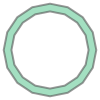

In [52]:
poly_a = structure_a.get_slice(-5.0)
print(f'Number of regions = {len(poly_a.regions)}')
print(f'Number of boundaries = {len(poly_a.boundaries)}')
poly_a.merge_regions()

# Error Boundary is missing hole
- It is present in contour graph
- it is referenced in the RegionSlice
- Most likely it is being added when it should be subtracted


Number of regions = 1
Number of boundaries = 1


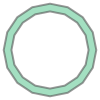

In [53]:
poly_a = structure_a.get_slice(-5.5)
print(f'Number of regions = {len(poly_a.regions)}')
print(f'Number of boundaries = {len(poly_a.boundaries)}')
rr = list(poly_a.regions.values())[0]
br = list(poly_a.boundaries.values())[0]
poly_a.merge_regions()

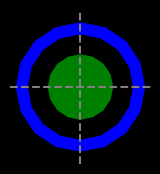

<Axes: >

In [54]:
poly_b = structure_b.get_slice(-5.5)
poly_b_b = list(poly_b.regions.values())[0]
plot_ab(br, poly_b_b)

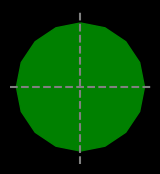

<Axes: >

In [55]:
plot_ab(rr, poly_b_b)

### Color Coding
<table style="border: 2px solid black; width=50px;"><tr><td>
<ul style="font-weight: 900; font-size: 20px;">
<li style="color: blue;">region a</li>
<li style="color: green;">region b</li>
<li style="color: orange;">intersection of a & b</li></ul>
</tr></td></>

In [56]:
structure_a.contour_lookup

,ROI,SliceIndex,HoleType,Interpolated,Boundary,ContourIndex,RegionIndex,Label
22,1,-5.5,None,True,True,1298,1A,"(1, -5.5, 1298)"
23,1,-5.5,Open,True,True,1299,1B,"(1, -5.5, 1299)"
0,1,-5.0,None,False,False,1276,1A,"(1, -5.0, 1276)"
1,1,-5.0,Open,False,False,1277,1B,"(1, -5.0, 1277)"
2,1,-4.0,None,False,False,1278,1A,"(1, -4.0, 1278)"
3,1,-4.0,Open,False,False,1279,1B,"(1, -4.0, 1279)"
4,1,-3.0,None,False,False,1280,1A,"(1, -3.0, 1280)"
5,1,-3.0,Open,False,False,1281,1B,"(1, -3.0, 1281)"
6,1,-2.0,None,False,False,1282,1A,"(1, -2.0, 1282)"
7,1,-2.0,Open,False,False,1283,1B,"(1, -2.0, 1283)"


In [57]:
poly_a.contour_indexes

{'1A': [(np.int64(1), -5.5, 1298), (np.int64(1), -5.5, 1299)]}

In [58]:
poly_a.open_holes

{'1A': <MULTIPOLYGON Z (((0 5 -5.5, 1.913 4.619 -5.5, 3.536 3.536 -5.5, 4.619 1.913...>}

In [59]:
print(DE27IM.test_binaries[0])

RelationshipTest(Relationship: Disjoint
  Mask:
    |110|	|000|	|000|
    |110|	|010|	|010|
    |000|	|100|	|100|
  Value
    |000|	|000|	|000|
    |000|	|000|	|000|
    |000|	|100|	|100|




In [60]:
print(DE27IM.test_binaries[3])

RelationshipTest(Relationship: Borders
  Mask:
    |100|	|000|	|000|
    |010|	|000|	|000|
    |000|	|100|	|000|
  Value
    |000|	|000|	|000|
    |010|	|000|	|000|
    |000|	|100|	|000|




#### Horizontal Disjoint Cylinders
- Same as above but with horizontal cylinders
- Cylindrical shell with an interior cylinder ending outside the larger 
    diameter cylinder
- The relationship is **Disjoint** because the Second cylinder extends beyond 
    the horizontal bounds of the First Structure, but doe not intersect the 
    First Structure.

In [61]:
def disjoint_horizontal_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_horizontal_cylinder(roi_num=1, radius=6, length=10,
                                              spacing=slice_spacing)
    cylinder_hole = make_horizontal_cylinder(roi_num=1, radius=5, length=10,
                                             spacing=slice_spacing)
    surrounded_cylinder = make_horizontal_cylinder(roi_num=2, radius=3,
                                                   length=12,
                                                   spacing=slice_spacing)
    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + surrounded_cylinder
    return slice_data


In [62]:
slice_data = disjoint_horizontal_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


#### Disjoint Parallel Cylinders
- Concentric hollow cylinder surrounding one of two smaller cylinders
- Second cylinder is parallel, but **Disjoint**.
- The relationship is **Disjoint** because the Second cylinder is outside of the First Structure, but doe not intersect the First Structure.

![Disjoint Parallel Cylinders](<../../Images/FreeCAD Images/Disjoint Parallel Cylinders.png>)

In [63]:
def parallel_disjoint_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=25, length=16, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    disjoint_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 offset_x=10, spacing=slice_spacing)
    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + inner_cylinder + disjoint_cylinder
    return slice_data


In [64]:
slice_data = parallel_disjoint_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


#### Disjoint Axial Cylinders
- Concentric hollow cylinder surrounding one of two smaller cylinders
- Second cylinder is on the same axis as the first, but above, making it **Disjoint**.
- The relationship is **Disjoint** because the Second cylinder is outside of the First Structure.

![Disjoint Parallel Cylinders](<../../Images/FreeCAD Images/Disjoint Axial Cylinders.png>)

In [65]:
def axial_disjoint_cylinder_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=30, offset_z=0,
                                  spacing=slice_spacing)
    outer_cylinder = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                            spacing=slice_spacing)
    cylinder_hole = make_vertical_cylinder(roi_num=1, radius=5, length=8,
                                           spacing=slice_spacing)
    inner_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 spacing=slice_spacing)

    disjoint_cylinder = make_vertical_cylinder(roi_num=2, radius=3, length=6,
                                                 offset_z=12, spacing=slice_spacing)
    # combine the contours
    slice_data = body + outer_cylinder + cylinder_hole + inner_cylinder + disjoint_cylinder
    return slice_data


In [66]:
slice_data = axial_disjoint_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


#### Disjoint Concentric Cylinders
- Centred vertical cylinder with two cylinders on the same axis, above and 
below the primary cylinder.

![Disjoint Concentric Cylinders](<../../Images/FreeCAD Images/Disjoint Concentric Cylinders.png>)


In [67]:
def disjoint_concentric_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10,
                                  spacing=slice_spacing)
    # Centred cylinder
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=3, length=8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder 2 slices above primary cylinder
    upper_cylinder1 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=7,
                                             spacing=slice_spacing)
    # cylinder 2 slices below primary cylinder
    lower_cylinder2 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=-7,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + upper_cylinder1 + lower_cylinder2
    return slice_data


In [68]:
slice_data = disjoint_concentric_cylinders_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

Relationship: Disjoint


## Borders

<link rel="stylesheet" href="relations.css">
<table width="400px">
<tr class="l"><th>Borders</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The exterior boundaries of 
<span class="a">a</span> and <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/borders.png" alt="Borders">
<img src="../../Images/Relationships/Concave Borders.png" alt="Concave Borders">
</td></tr></table>

#### Bordering Concentric Cylinders
- Centred vertical cylinder with two cylinders on the same axis, above and 
below the primary cylinder.

![Bordering Concentric Cylinders](<../../Images/FreeCAD Images/Bordering  Concentric Cylinders.png>)

In [69]:
def bordering_concentric_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=3, length=8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder1 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=6,
                                             spacing=slice_spacing)
    # cylinder bordering primary cylinder
    bordering_cylinder2 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=-6,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + bordering_cylinder1 + bordering_cylinder2
    return slice_data


In [70]:
slice_data = bordering_concentric_cylinders_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


#### Bordering Lateral Boxes
- Cubes with 'x' faces touching.

![Bordering Lateral Boxes](<../../Images/FreeCAD Images/Bordering Boxes.png>)


In [71]:
def lateral_borders_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    left_cube = make_box(roi_num=1, width=2, offset_x=-1,
                         spacing=slice_spacing)
    right_cube = make_box(roi_num=2, width=2, offset_x=1,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = left_cube + right_cube + body
    return slice_data

In [72]:
slice_data = lateral_borders_boxes_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


#### Bordering Lateral Boxes With Disjoint Box
- Cubes with one touching and one disjoint.

![Bordering Lateral Boxes With Disjoint Box](<../../Images/FreeCAD Images/Bordering Boxes With Disjoint Box.png>)


In [73]:
def lateral_borders_two_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=20, offset_z=0,
                                  spacing=slice_spacing)
    # embedded boxes
    left_cube = make_box(roi_num=1, width=2, offset_x=-1,
                         spacing=slice_spacing)
    right_cube = make_box(roi_num=2, width=2, offset_x=1,
                         spacing=slice_spacing)
    disjoint_cube = make_box(roi_num=2, width=2, offset_x=-2,
                         spacing=slice_spacing)
    # combine the contours
    slice_data = left_cube + right_cube + body
    return slice_data

In [74]:
slice_data = lateral_borders_two_boxes_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


### Bordering Concentric Cylinder SUP Offset
  - Primary: Central Cylinder
    - Secondary: one of:
      - SUP cylinders with single slice gap at the SUP boundary of the central cylinder.

      
![Bordering Concentric Cylinder SUP Offset](<../../Images/FreeCAD Images/Bordering Concentric Cylinder SUP Offset.png>)
![Exterior Border SUP](../../Images/Boundaries/ExteriorBorders2D_SUP.png)

In [75]:
def concentric_cylinders_sup_offset_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.5,
                                  spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=0.2, length=0.4,
                                              offset_z=-0.5,
                                              spacing=slice_spacing)
    sup_cylinder = make_vertical_cylinder(roi_num=2, radius=0.2, length=0.4,
                                          offset_z=0, spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + sup_cylinder
    return slice_data


In [76]:
slice_data = concentric_cylinders_sup_offset_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.BORDERS

Relationship: Borders


## Confines (Interior Borders) 

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Confines</th><th>Symmetric</th></tr>
<td class="d" colspan="2">The interior boundary of 
<span class="a">a</span> 
and the exterior boundary of <span class="b">b</span> 
have more than one point in common, but their interiors do not intersect.

For Interior Borders <span class="b">b</span> 
Should be Within <span class="a">a</span>.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/confines.png" alt="Confines">
<img src="../../Images/Relationships/confines with island.png" alt="Confines With Island">
</td></tr></table>

### Confines Box embedded in Box

![Box embedded in Box](<../../Images/FreeCAD Images/Confines Bordering Boxes.png>)

In [77]:
def confined_bordering_boxes_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.2,
                                spacing=slice_spacing)
    # embedded boxes
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    hole4 = make_box(roi_num=1, width=4,  spacing=slice_spacing)
    Box4 = make_box(roi_num=2, width=4,  spacing=slice_spacing)

    # combine the contours
    slice_data = body + box6 + hole4 + Box4
    return slice_data


In [78]:
slice_data = confined_bordering_boxes_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


### Confines Cylinders

![Confines cylinder](../../FreeCAD_Scripts/confines_cylinder.png)

In [79]:
def confines_cylinder_example():
    slice_spacing = 1.0
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=8,
                                    spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5,
                                                length=6,
                                                spacing=slice_spacing)
    left_hole = make_vertical_cylinder(roi_num=1, radius=2, length=4,
                                       offset_x=-2.5, spacing=slice_spacing)
    right_hole = make_vertical_cylinder(roi_num=1, radius=2, length=4,
                                        offset_x=2.5, spacing=slice_spacing)
    # cylinder with interior borders
    confines_cylinder = make_vertical_cylinder(roi_num=2, radius=1,
                                                length=4, offset_x=2.5,
                                                spacing=slice_spacing)
    # combine the contours
    slice_data = body + confines_cylinder + primary_cylinder + right_hole + left_hole
    return slice_data


In [80]:
slice_data = confines_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


In [81]:
poly_a = structure_a.get_slice(2.5)

1


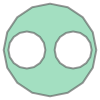

In [82]:
print(len(poly_a.regions))
rr = list(poly_a.regions.values())[0]
rr

1


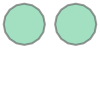

In [83]:
print(len(poly_a.boundaries))
br = list(poly_a.boundaries.values())[0]
br

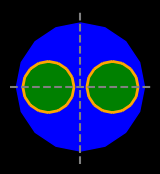

<Axes: >

In [84]:
plot_ab(rr, br)

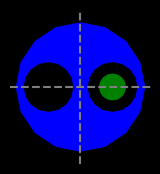

<Axes: >

In [85]:
poly_b = structure_b.get_slice(2.5)
poly_b_b = list(poly_b.boundaries.values())[0]
plot_ab(rr, poly_b_b)

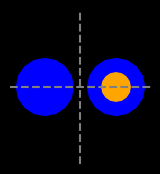

<Axes: >

In [86]:
plot_ab(br, poly_b_b)

### Confines Embedded Cylinders
  - Primary: Central Cylinder
  - Concentric shorter hole in the center of the primary cylinder
  - Secondary same height as hole but narrower
  - Interior borders at the and bottom of hole.
  
![Confines Embedded Cylinders](<../../Images/FreeCAD Images/Confines Embedded Cylinder.png>)

In [87]:
def embedded_cylinder_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                  spacing=slice_spacing)
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=4, length=0.8,
                                              spacing=slice_spacing)
    center_hole = make_vertical_cylinder(roi_num=1, radius=2, length=0.6,
                                         spacing=slice_spacing)
    # Two concentric cylinders different z offsets
    middle_cylinder = make_vertical_cylinder(roi_num=2, radius=1, length=0.6,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + center_hole + middle_cylinder
    return slice_data


In [88]:
slice_data = embedded_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


In [89]:
#logging.getLogger('structure_set').setLevel(logging.DEBUG)
#logging.getLogger('contour_graph').setLevel(logging.DEBUG)
structures = StructureSet(slice_data)
#logging.getLogger('structure_set').setLevel(logging.INFO)
#logging.getLogger('contour_graph').setLevel(logging.INFO)

In [90]:
structure_a = structures.structures[1]
structure_b = structures.structures[2]

In [91]:
#logging.getLogger('structures').setLevel(logging.DEBUG)
relation = structure_a.relate(structure_b)
#logging.getLogger('structures').setLevel(logging.INFO)


In [92]:
print(relation)

|001|	|111|	|111|
|011|	|001|	|001|
|111|	|001|	|001|



#### Relationship Test CONFINES

```
MASK:
|100| |101| |000|
|010| |000| |000|
|000| |100| |000|

VALUES:
|000| |101| |000|
|010| |000| |000|
|000| |000| |000|


In [93]:
selected_columns = ['SliceIndex', 'HoleType', 'Interpolated', 'Boundary',
                    'RegionIndex']

print(structure_a.contour_lookup[selected_columns])


    SliceIndex HoleType  Interpolated  Boundary RegionIndex
21       -0.45     None          True      True          1A
0        -0.40     None         False     False          1A
16       -0.35   Closed          True      True          1B
17       -0.35     None          True     False          1A
1        -0.30     None         False     False          1A
2        -0.30   Closed         False     False          1B
3        -0.20     None         False     False          1A
4        -0.20   Closed         False     False          1B
5        -0.10     None         False     False          1A
6        -0.10   Closed         False     False          1B
7         0.00     None         False     False          1A
8         0.00   Closed         False     False          1B
9         0.10     None         False     False          1A
10        0.10   Closed         False     False          1B
11        0.20     None         False     False          1A
12        0.20   Closed         False   

In [94]:
print(structure_b.contour_lookup[selected_columns])

   SliceIndex HoleType  Interpolated  Boundary RegionIndex
8       -0.35     None          True      True          2A
0       -0.30     None         False     False          2A
1       -0.20     None         False     False          2A
2       -0.10     None         False     False          2A
3        0.00     None         False     False          2A
4        0.10     None         False     False          2A
5        0.20     None         False     False          2A
6        0.30     None         False     False          2A
7        0.35     None          True      True          2A


### Confines Embedded Spheres
   - concentric shells
   - Sphere within shell with inner island
 
![Confines Embedded Spheres](<../../Images/FreeCAD Images/Confines Embedded Spheres.png>)

In [95]:
def embedded_spheres_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.6,
                                  spacing=slice_spacing)

    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole10 = make_sphere(roi_num=1, radius=5, spacing=slice_spacing)
    sphere8 = make_sphere(roi_num=1, radius=4, spacing=slice_spacing)

    sphere10 = make_sphere(roi_num=2, radius=5, spacing=slice_spacing)
    hole8 = make_sphere(roi_num=2, radius=4, spacing=slice_spacing)

    # combine the contours
    slice_data = body + sphere12 + hole10 + sphere8 + sphere10 + hole8
    return slice_data


In [96]:
slice_data = embedded_spheres_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


### Confines Box in Box on z surface
 - Box in box, touching z plane hole surface only
 
![Confines Box in Box on z surface](<../../Images/FreeCAD Images/Confines Box in Box on z surface.png>)

In [97]:
def confined_box_z_border_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.2,
                                spacing=slice_spacing)
    # embedded boxes
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    hole4 = make_box(roi_num=1, width=4,  spacing=slice_spacing)
    Box2 = make_box(roi_num=2, width=2, offset_z=1,  spacing=slice_spacing)

    # combine the contours
    slice_data = body + box6 + hole4 + Box2
    return slice_data


In [98]:
slice_data = confined_box_z_border_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


### Confines Box in Box on Y surface
 - Box in box, touching Y plane hole surface only
 
![Confines Box in Box on Y surface](<../../Images/FreeCAD Images/Confines Box in Box on y surface.png>)

In [99]:
def confined_box_y_border_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.2,
                                spacing=slice_spacing)
    # embedded boxes
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    hole4 = make_box(roi_num=1, width=4,  spacing=slice_spacing)
    Box2 = make_box(roi_num=2, width=2, offset_y=1,  spacing=slice_spacing)

    # combine the contours
    slice_data = body + box6 + hole4 + Box2
    return slice_data


In [100]:
slice_data = confined_box_y_border_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.CONFINES

Relationship: Confines


## Partition

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Partition</th><th></th></tr>
<td class="d" colspan="2">
The boundaries of <span class="a">a</span> and <span class="b">b</span> have more than one point in common.
No points of <span class="b">b</span> are exterior to <span class="a">a</span>, and some points in <span class="a">a</span> are exterior to <span class="b">b</span>.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/partitions simple.png" alt="Partition">
<img src="../../Images/Relationships/partitions archipelago with island.png" alt="Partition With Island">
<img src="../../Images/Relationships/partitions partial ring.png" alt="Partition Ring">
</td></tr></table>

**Partition**

- half shell

### Partition Box in Box on Y surface
 - Box part of box, touching Y plane surface only
 
![Partition Box in Box on Y surface](<../../Images/FreeCAD Images/Partition Box in Box on y surface.png>)

In [101]:
def partition_embedded_box_on_y_surface():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, spacing=slice_spacing)
    # embedded boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    box6_3 = make_box(roi_num=2, width=6, length=3, height=6, offset_y=1.5,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = box6 + box6_3 + body
    return slice_data


In [102]:
slice_data = partition_embedded_box_on_y_surface()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


### Partition Box in Box on Z surface
 - Box part of box, touching Z plane surface only
 
![Partition Box in Box on Z surface](<../../Images/FreeCAD Images/Partition Box in Box on z surface.png>)

In [103]:
def partition_embedded_box_on_z_surface():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30,
                                  spacing=slice_spacing)
    # embedded boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    box6_3 = make_box(roi_num=2, width=6, length=6, height=3, offset_z=1.5,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = box6 + box6_3 + body
    return slice_data


In [104]:
slice_data = partition_embedded_box_on_z_surface()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


#### Horizontal Cylinders

![Horizontal Cylinders](../../Images/FreeCAD%20Images/HorizontalCylinders.png)

In [105]:
def horizontal_cylinders():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_box(roi_num=0, width=6, length=6, height=8, offset_z=-4,
                    spacing=slice_spacing)
    cylinder2h = make_horizontal_cylinder(radius=2, length=5, roi_num=1,
                                          spacing=slice_spacing)
    cylinder1h = make_horizontal_cylinder(radius=1, length=5, roi_num=2,
                                          spacing=slice_spacing)
    # combine the contours
    slice_data = body + cylinder1h + cylinder2h
    return slice_data


In [106]:
slice_data = horizontal_cylinders()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


 #### Vertical Concentric Cylinders
 
 ![Concentric Cylinders](../../Images/FreeCAD%20Images/ConcentricCylinders.png)

In [107]:
def vertical_concentric_cylinders():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    cylinder6 = make_vertical_cylinder(roi_num=1, radius=6, length=10,
                                    spacing=slice_spacing)
    cylinder4 = make_vertical_cylinder(roi_num=2, radius=4, length=10,
                                    spacing=slice_spacing)
    # combine the contours
    slice_data = body + cylinder6 + cylinder4
    return slice_data


In [108]:
slice_data = vertical_concentric_cylinders()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


#### Concentric cylinders starting on the same slice
  
<img src="../../Images\Boundaries\PartitionSup3D.png" alt="PartitionSup3D" style="height:50px;">
<img src="../../Images\Boundaries\PartitionSup2D.png" alt="PartitionSup2D" style="height:30px;">

In [109]:
def concentric_cylinders_same_start():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                  spacing=slice_spacing)
    # Concentric cylinders starting on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=7,
                                              offset_z=-3.5,
                                              spacing=slice_spacing)
    sup_partition = make_vertical_cylinder(roi_num=2, radius=1, length=3.0,
                                           offset_z=-1.5,
                                           spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + sup_partition
    return slice_data


In [110]:
slice_data = concentric_cylinders_same_start()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


#### Concentric cylinders ending on the same slice.

<img src="../../Images\Boundaries\PartitionInf3D.png" alt="PartitionInf3D" style="height:50px;">
<img src="../../Images\Boundaries\PartitionInf2D.png" alt="PartitionInf2D" style="height:30px;">

In [111]:
def concentric_cylinders_same_end():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=10,
                                  spacing=slice_spacing)
    # Concentric cylinders ending on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=7.0,
                                              offset_z=3.5,
                                              spacing=slice_spacing)
    inf_partition = make_vertical_cylinder(roi_num=2, radius=1, length=4,
                                           offset_z=2, spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + inf_partition
    return slice_data


In [112]:
slice_data = concentric_cylinders_same_end()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


#### Concentric cylinders starting and ending on the same slice.

<img src="../../Images\Boundaries\Partition3D.png" alt="PartitionInf3D" style="height:50px;">
<img src="../../Images\Boundaries\Partition2D.png" alt="PartitionInf2D" style="height:30px;">

In [113]:
def concentric_cylinders_same_start_end():
    slice_spacing = 0.05
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                  spacing=slice_spacing)
    # Concentric cylinders starting and ending on the same slice
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=2, length=0.7,
                                              offset_z=0.0,
                                              spacing=slice_spacing)
    mid_partition = make_vertical_cylinder(roi_num=2, radius=1, length=0.7,
                                           offset_z=-0.0, spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + mid_partition
    return slice_data


In [114]:
slice_data = concentric_cylinders_same_start_end()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


### Partition Sphere Island
   - concentric shells
   - 2nd structure matches inner island
 
![Partition Sphere Island](<../../Images/FreeCAD Images/Partition Sphere Island.png>)

In [115]:
def partition_sphere_island_example():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1, offset_z=-0.6,
                                  spacing=slice_spacing)

    sphere12 = make_sphere(roi_num=1, radius=6, spacing=slice_spacing)
    hole8 = make_sphere(roi_num=1, radius=4, spacing=slice_spacing)
    sphere4 = make_sphere(roi_num=1, radius=2, spacing=slice_spacing)

    sphere4_2 = make_sphere(roi_num=2, radius=2, spacing=slice_spacing)

    # combine the contours
    slice_data = body + sphere12 + hole8 + sphere4 + sphere4_2
    return slice_data


In [116]:
slice_data = partition_sphere_island_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.PARTITION

Relationship: Partition


## Overlaps

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Overlaps</th><th>Symmetric</th></tr>
<td class="d" colspan="2">
<span class="a">a</span> and <span class="b">b</span> 
have some but not all points in common.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/overlaps simple.png" alt="Overlaps">
<img src="../../Images/Relationships/overlaps ring.png" alt="Overlaps With Ring">
<img src="../../Images/Relationships/overlaps surounded.png" alt="Overlaps Surrounded">
<img src="../../Images/Relationships/overlaps ring surrounds simple.png" alt="Ring Overlaps Simple">
<img src="../../Images/Relationships/archipelago contains simple.png" alt="Ring Overlaps Simple">
</td></tr></table>

### Overlapping Spheres 

![Overlapping Spheres](<../../Images/FreeCAD Images/Overlapping Spheres.png>)

In [117]:
def overlapping_spheres_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=10,
                                  spacing=slice_spacing)

    right_sphere6 = make_sphere(roi_num=1, radius=6, offset_x=-2,
                                spacing=slice_spacing)
    left_sphere6 = make_sphere(roi_num=2, radius=6, offset_x=2,
                                spacing=slice_spacing)

    # combine the contours
    slice_data = body + right_sphere6 + left_sphere6
    return slice_data


In [118]:
slice_data = overlapping_spheres_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Overlapping Boxes in the Y Direction 

![Overlapping Boxes in the Y Direction](<../../Images/FreeCAD Images/Overlapping Boxes in Y direction.png>)

In [119]:
def overlapping_boxes_y():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    box6_y = make_box(roi_num=2, width=0.6, offset_y=0.2,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = box6 + box6_y + body
    return slice_data


In [120]:
slice_data = overlapping_boxes_y()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Overlapping Boxes in the Z Direction 

![Overlapping Boxes in the Z Direction](<../../Images/FreeCAD Images/Overlapping Boxes in Z direction.png>)

In [121]:
def overlapping_boxes_z():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    box6_y = make_box(roi_num=2, width=0.6, offset_z=0.3,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = box6 + box6_y + body
    return slice_data


In [122]:
slice_data = overlapping_boxes_z()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Stacked Boxes

![Stacked Boxes](<../../Images/FreeCAD Images/Stacked Boxes.png>)

In [123]:
def stacked_boxes():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    box6_y = make_box(roi_num=2, width=0.6, offset_z=0.6,
                      spacing=slice_spacing)
    # combine the contours
    slice_data = box6 + box6_y + body
    return slice_data

In [124]:
slice_data = stacked_boxes()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Overlapping Concentric Cylinders
- Centred vertical cylinder with two cylinders on the same axis, above and 
below the primary cylinder.

- Cylinders are overlapping because they have a contour on the same slices (-0.4, and 0.4).

![Overlapping Concentric Cylinders](<../../Images/FreeCAD Images/Overlapping Concentric Cylinders.png>)


In [125]:
def overlapping_concentric_cylinders_example():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=10,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=3, length=8,
                                              offset_z=0,
                                              spacing=slice_spacing)
    # cylinder overlapping primary cylinder
    overlapping_cylinder1 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=5,
                                             spacing=slice_spacing)
    # cylinder overlapping primary cylinder
    overlapping_cylinder2 = make_vertical_cylinder(roi_num=2, radius=1, length=2,
                                             offset_z=-5,
                                             spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + overlapping_cylinder1 + overlapping_cylinder2
    return slice_data


In [126]:
slice_data = overlapping_concentric_cylinders_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Overlapping Cubes INF RT

![Overlapping Cubes INF RT](<../../Images/FreeCAD Images/Overlapping Cubes INF RT.png>)

In [127]:
def overlapping_cubes_inf_rt():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=30, offset_z=-15,
                                spacing=slice_spacing)
    #
    cube6 = make_box(roi_num=1, width=6, spacing=slice_spacing)
    cube6_inf_rt = make_box(roi_num=2, width=6, offset_z=3, offset_x=3,
                            offset_y=3, spacing=slice_spacing)
    # combine the contours
    slice_data = body + cube6 + cube6_inf_rt
    return slice_data


In [128]:
slice_data = overlapping_cubes_inf_rt()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


### Overlapping Extended Cylinder

![Overlapping Extended Cylinder](<../../Images/FreeCAD Images/Overlapping Extended Cylinder.png>)

In [129]:
def overlapping_extended_cylinder():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=1.1,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=0.7,
                                              spacing=slice_spacing)
    # cylinder with interior borders
    overlapping_cylinder = make_vertical_cylinder(roi_num=2, radius=3,
                                                  length=0.9,
                                                  spacing=slice_spacing)

    # combine the contours
    slice_data = body + primary_cylinder + overlapping_cylinder
    return slice_data


In [130]:
slice_data = overlapping_extended_cylinder()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.OVERLAPS

Relationship: Overlaps


## Equals

<link rel="stylesheet" href="relations.css">
<table width="350px">
<tr class="l"><th>Equals</th><th>Symmetric, Transitive</th></tr>
<td class="d" colspan="2">
The interiors of <span class="a">a</span> and <span class="b">b</span> 
intersect and no part of the interior of one geometry intersects the exterior of the other.
</td></tr>
<tr><td colspan="2">
<img src="../../Images/Relationships/equals.png" alt="Equals">
</td></tr></table>

### Equal Spheres 


In [131]:
def equal_spheres_example():
    slice_spacing = 0.5
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=20, length=10,
                                  spacing=slice_spacing)

    a_sphere6 = make_sphere(roi_num=1, radius=6,
                                spacing=slice_spacing)
    b_sphere6 = make_sphere(roi_num=2, radius=6,
                                spacing=slice_spacing)

    # combine the contours
    slice_data = body + a_sphere6 + b_sphere6
    return slice_data


In [132]:
slice_data = equal_spheres_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.EQUALS

Relationship: Equals


### Equal Boxes 


In [133]:
def equal_boxes():
    slice_spacing = 0.1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                spacing=slice_spacing)
    # overlapping boxes    # 6 cm x 6 cm box
    a_box6 = make_box(roi_num=1, width=0.6, spacing=slice_spacing)
    b_box6 = make_box(roi_num=2, width=0.6, spacing=slice_spacing)
    # combine the contours
    slice_data = a_box6 + b_box6 + body
    return slice_data


In [134]:
slice_data = equal_boxes()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.EQUALS

Relationship: Equals


# Done To Here

### Equal box created by cropping a larger box.

In [137]:
def equal_boxes_by_crop():
    def apply_crop(p):
        # polygon made from offset boxed resulting in a 4x4 square hole in the
        # middle.
        left_xy_points = box_points(width=0.8, offset_x=0.6, offset_y=0)
        left_crop = shapely.Polygon(left_xy_points)
        right_xy_points = box_points(width=0.8, offset_x=-0.6, offset_y=0)
        right_crop = shapely.Polygon(right_xy_points)
        up_xy_points = box_points(width=0.8, offset_x=0, offset_y=0.6)
        up_crop = shapely.Polygon(up_xy_points)
        down_xy_points = box_points(width=0.8, offset_x=0, offset_y=-0.6)
        down_crop = shapely.Polygon(down_xy_points)
        crop_poly = shapely.union_all([left_crop, right_crop,
                                       up_crop, down_crop])
        cropped = p - crop_poly
        return poly_round(cropped)

    def get_cropped_box(box8):# -> List[Dict[str, Any]]:
        cropped_box = []
        for contour_slice in box8:
            contour = contour_slice['Points']
            poly = shapely.Polygon(contour)
            cropped_poly = apply_crop(poly)
            cropped_coords = list(cropped_poly.boundary.coords)
            cropped_contour = {
                'ROI': contour_slice['ROI'],
                'Slice': contour_slice['Slice'],
                'Points': cropped_coords,
            }
            cropped_box.append(cropped_contour)
        return cropped_box
    slice_spacing = 0.1
    body = make_vertical_cylinder(roi_num=0, radius=10, length=1,
                                  spacing=slice_spacing)
    box8 = make_box(roi_num=1, width=0.8, spacing=slice_spacing)
    box4 = make_box(roi_num=2, width=0.4, spacing=slice_spacing)
    # apply the crop to box8 to create a copy of box4
    cropped_box = get_cropped_box(box8)
    slice_data = box4 + body + cropped_box
    return slice_data


In [136]:
slice_data = equal_boxes_by_crop()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.EQUALS

Relationship: Partition


AssertionError: 

In [145]:
slice_data = equal_boxes_by_crop()
#logging.getLogger('structure_set').setLevel(logging.DEBUG)
#logging.getLogger('contour_graph').setLevel(logging.DEBUG)
structures = StructureSet(slice_data)
#logging.getLogger('structure_set').setLevel(logging.INFO)
#logging.getLogger('contour_graph').setLevel(logging.INFO)


In [146]:
structure_a = structures.structures[1]
structure_b = structures.structures[2]


?# Why are the "Equal" structures different lengths
**ROI 1**

|SliceIndex|Interpolated|BoundaryRegionIndex|
|----------|------------|-------------------|
|  -0.45   |      True  |  True     1A      |
|  -0.40   |     False  | False     1A      |
|  -0.30   |     False  | False     1A      |
|  -0.25   |      True  | False     1A      |
|  -0.20   |     False  | False     1A      |
|  -0.10   |     False  | False     1A      |
|   0.00   |     False  | False     1A      |

...


**ROI 2**

|SliceIndex|Interpolated|Boundary|RegionIndex|
|----------|------------|--------|-----------|
|  -0.25   |     True   |  True  |     2A    |
|  -0.20   |    False   | False  |     2A    |
|  -0.10   |    False   | False  |     2A    |
|   0.00   |    False   | False  |     2A    |
|   0.10   |    False   | False  |     2A    |
|   0.20   |    False   | False  |     2A    |
|   0.25   |     True   |  True  |     2A    |


In [147]:
structure_a.contour_lookup

,ROI,SliceIndex,HoleType,Interpolated,Boundary,ContourIndex,RegionIndex,Label
9,1,-0.45,None,True,True,4912,1A,"(1, -0.45, 4912)"
0,1,-0.40,None,False,False,4903,1A,"(1, -0.4, 4903)"
1,1,-0.30,None,False,False,4904,1A,"(1, -0.3, 4904)"
11,1,-0.25,None,True,False,4925,1A,"(1, -0.25, 4925)"
2,1,-0.20,None,False,False,4905,1A,"(1, -0.2, 4905)"
3,1,-0.10,None,False,False,4906,1A,"(1, -0.1, 4906)"
4,1,0.00,None,False,False,4907,1A,"(1, 0.0, 4907)"
5,1,0.10,None,False,False,4908,1A,"(1, 0.1, 4908)"
6,1,0.20,None,False,False,4909,1A,"(1, 0.2, 4909)"
12,1,0.25,None,True,False,4926,1A,"(1, 0.25, 4926)"


In [148]:
structure_b.contour_lookup

,ROI,SliceIndex,HoleType,Interpolated,Boundary,ContourIndex,RegionIndex,Label
5,2,-0.25,None,True,True,4919,2A,"(2, -0.25, 4919)"
0,2,-0.20,None,False,False,4914,2A,"(2, -0.2, 4914)"
1,2,-0.10,None,False,False,4915,2A,"(2, -0.1, 4915)"
2,2,0.00,None,False,False,4916,2A,"(2, 0.0, 4916)"
3,2,0.10,None,False,False,4917,2A,"(2, 0.1, 4917)"
4,2,0.20,None,False,False,4918,2A,"(2, 0.2, 4918)"
6,2,0.25,None,True,True,4920,2A,"(2, 0.25, 4920)"


In [139]:
logging.getLogger('structures').setLevel(logging.DEBUG)
relation = structure_a.relate(structure_b)
logging.getLogger('structures').setLevel(logging.INFO)

DEBUG:structures:SliceIndex: -0.45,
RelationType: Relationship: Unknown
Relation:
|001|	|001|	|001|
|001|	|001|	|001|
|001|	|001|	|001|


DEBUG:structures:SliceIndex: -0.4,
RelationType: Relationship: Unknown
Relation:
|001|	|001|	|001|
|001|	|001|	|001|
|001|	|001|	|001|


DEBUG:structures:SliceIndex: -0.3,
RelationType: Relationship: Unknown
Relation:
|001|	|001|	|001|
|001|	|001|	|001|
|001|	|001|	|001|


DEBUG:structures:SliceIndex: -0.25,
RelationType: Relationship: Unknown
Relation:
|010|	|000|	|000|
|010|	|000|	|000|
|001|	|000|	|000|


DEBUG:structures:SliceIndex: -0.2,
RelationType: Relationship: Equals
Relation:
|100|	|100|	|100|
|010|	|010|	|010|
|001|	|001|	|001|


DEBUG:structures:SliceIndex: -0.1,
RelationType: Relationship: Equals
Relation:
|100|	|100|	|100|
|010|	|010|	|010|
|001|	|001|	|001|


DEBUG:structures:SliceIndex: 0.0,
RelationType: Relationship: Equals
Relation:
|100|	|100|	|100|
|010|	|010|	|010|
|001|	|001|	|001|


DEBUG:structures:SliceIndex: 0.1,
RelationT

In [143]:
print(DE27IM.test_binaries[6])

RelationshipTest(Relationship: Equals
  Mask:
    |101|	|000|	|000|
    |010|	|000|	|000|
    |100|	|000|	|000|
  Value
    |100|	|000|	|000|
    |010|	|000|	|000|
    |000|	|000|	|000|




In [141]:
print(relation)
relation_type = relation.identify_relation()
print(relation_type)

|111|	|101|	|101|
|011|	|011|	|011|
|001|	|001|	|001|

Relationship: Partition


# Misc. Debugging Code

In [ ]:
logging.getLogger('structures').setLevel(logging.DEBUG)
relation = structure_a.relate(structure_b)
logging.getLogger('structures').setLevel(logging.INFO)

print(relation)

: 

: 

In [ ]:
relation = structure_a.relate(structure_b)
print(relation)
relation_type = relation.identify_relation()
print(relation_type)

: 

: 

In [ ]:
poly_a = structure_a.get_slice(0.0)
poly_b = structure_b.get_slice(0.0)
ax = plot_ab(poly_a, poly_b, add_axis=False)

: 

: 

In [ ]:
poly_a = structure_a.get_slice(1.0)
poly_b = structure_b.get_slice(1.0)
ax = plot_ab(poly_a, poly_b, add_axis=False)

: 

: 

In [ ]:
poly_a = structure_a.get_slice(1.5)
poly_b = structure_b.get_slice(1.5)
ax = plot_ab(poly_a, poly_b, add_axis=False)

: 

: 

In [ ]:
slice_data = extended_inner_cylinder_example()
structures = StructureSet(slice_data)
structure_a = structures.structures[1]
structure_b = structures.structures[2]

poly_a = structure_a.get_slice(5.5)
poly_b = structure_b.get_slice(5.5)
plot_ab(poly_a, poly_b)
structure_a.relate(structure_b)

: 

: 

In [ ]:
poly_a = structure_a.get_slice(0)
poly_b = structure_b.get_slice(0)
plot_ab(poly_a, poly_b)

: 

: 

In [ ]:
structure_a.contour_lookup

: 

: 

In [ ]:
structure_a.get_contour((1,-5.5,43)).polygon - structure_a.get_contour((1,-5.5,44)).polygon

: 

: 

In [ ]:
structure_a.get_contour((1,-5.0,19)).polygon.bounds

: 

: 

In [ ]:
structure_a.get_contour((1,-5.5,43)).polygon.bounds

: 

: 

## Results from individual slices
```
Slice Index: -6.0 Relationship: Disjoint 
|000|	|000|	|000|
|000|	|000|	|000|
|111|	|111|	|111|

Slice Index: -5.5 Relationship: **Unknown** 
|000|	|000|	|000|
|111|	|000|	|000|
|111|	|000|	|000|

Slice Index: -5.0 Relationship: Shelters 
|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|

...

Slice Index: 5.0 Relationship: Shelters 
|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|

Slice Index: 5.5 Relationship: **Unknown** 
|000|	|000|	|000|
|111|	|000|	|000|
|111|	|000|	|000|

Slice Index: 6.0 Relationship: Disjoint 
|000|	|000|	|000|
|000|	|000|	|000|
|111|	|111|	|111|

```

In [ ]:
relation = structure_a.relate(structure_b)
print(relation.identify_relation())

: 

: 

In [ ]:
r = DE27IM(structure_a,structure_b,slice_index=0)
print(r.identify_relation())

: 

: 

In [ ]:
def relation_example(structure_a,structure_b, slice_index):
    poly_a = structure_a.get_contour(slice_index)
    poly_b = structure_b.get_contour(slice_index)

    r = DE27IM(poly_a, poly_b)
    print('Relation Binary', r)
    print('Relationship', r.identify_relation())
    plot_ab(poly_a.contour, poly_b.contour)

: 

: 

In [ ]:
relation_example(structure_a, structure_b,slice_index=0)

: 

: 

In [ ]:
structure_a

: 

: 

In [ ]:
relation = structure_a.relate(structure_b)
relation_type = relation.identify_relation()
print(relation_type)
assert relation_type == RelationshipType.DISJOINT

: 

: 